In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'


In [4]:
g = pd.read_json('../structures/ancestral-variants.json', orient='records')

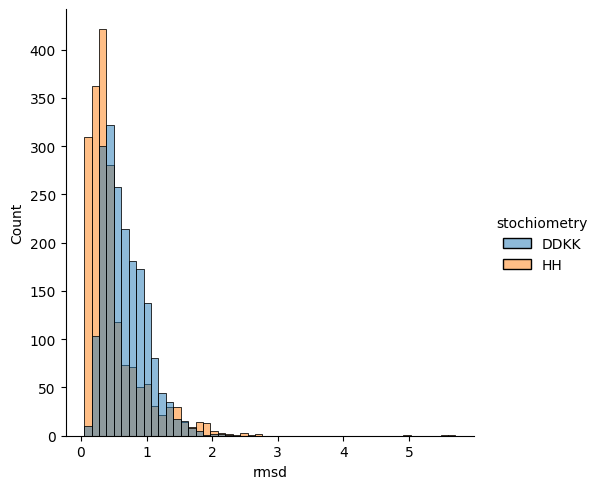

In [5]:
sns.displot(x='rmsd', hue='stochiometry', data=g, bins=50)

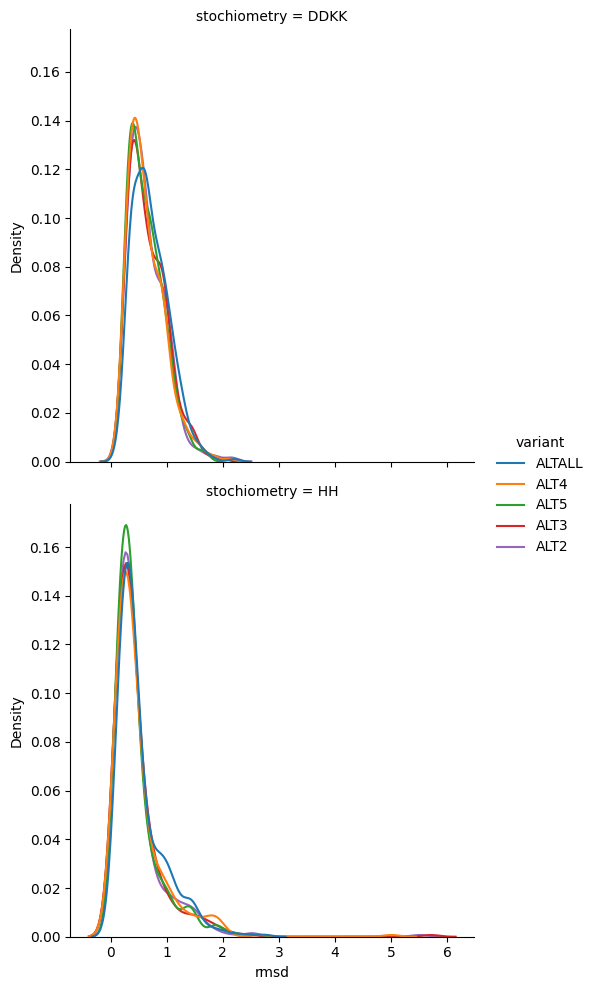

In [6]:
sns.displot(x='rmsd', row='stochiometry', data=g, hue='variant', kind='kde')

In [7]:
g_mean = g[['lineage', 'stochiometry', 'rmsd', 'tm2']].groupby(['lineage', 'stochiometry'], as_index=False).mean()

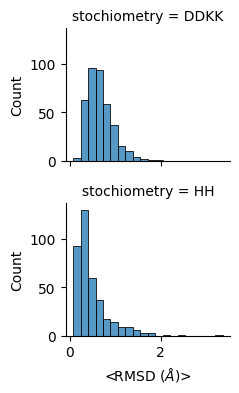

In [8]:
g = sns.displot(x='rmsd', row='stochiometry', data=g_mean, bins=20, height=2, aspect=1.25)
g.set_xlabels('<RMSD ($\AA$)>')
g.savefig('../figures/ddkk-hh-histogram-ancvar-rmsd.svg')
g.savefig('../figures/ddkk-hh-histogram-ancvar-rmsd.png', dpi=300)

In [9]:
def place_anc_tag(x):
    try:
        int(x.split('_')[0])
        return 'Anc_' + x + '_map'
    except:
        return x

distances_from_root = pd.read_csv('../data/tree/AGNifAlign103.asr.dist821.csv').rename(columns={'node': 'id'})
distances_from_root['id'] = distances_from_root['id'].apply(place_anc_tag)
distances_from_root['ancestral'] = distances_from_root['id'].apply(lambda x: x[:3] == 'Anc')
distances_from_root = distances_from_root.query('ancestral == True').copy()
distances_from_root['id'] = distances_from_root['id'].apply(lambda x: x.replace('_map', ''))
distances_from_root

,id,dist_from_821,ancestral
0,Anc_771,1.829611,True
1,Anc_772,1.795645,True
2,Anc_781,1.776833,True
3,Anc_783,1.756560,True
4,Anc_784,1.709936,True
...,...,...,...
763,Anc_778,1.914698,True
764,Anc_780,1.959595,True
765,Anc_779,1.949699,True
766,Anc_775,1.889152,True


In [10]:
g_mean = pd.merge(g_mean, distances_from_root, left_on='lineage', right_on='id', how='inner')

In [11]:
g_mean

,lineage,stochiometry,rmsd,tm2,id,dist_from_821,ancestral
0,Anc_1206,DDKK,0.670,0.997560,Anc_1206,0.212418,True
1,Anc_1206,HH,0.220,0.999260,Anc_1206,0.212418,True
2,Anc_1207,DDKK,0.418,0.999080,Anc_1207,0.684696,True
3,Anc_1207,HH,0.552,0.989280,Anc_1207,0.684696,True
4,Anc_1208,DDKK,0.410,0.999100,Anc_1208,1.049746,True
...,...,...,...,...,...,...,...
763,Anc_819,HH,3.362,0.832360,Anc_819,1.143298,True
764,Anc_820,DDKK,0.860,0.996475,Anc_820,0.226952,True
765,Anc_820,HH,0.500,0.996600,Anc_820,0.226952,True
766,Anc_821,DDKK,0.954,0.995680,Anc_821,0.000000,True


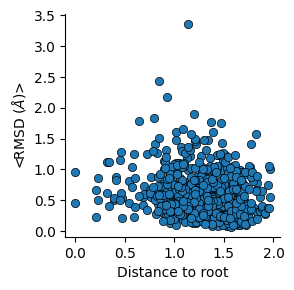

In [13]:
# g = sns.displot(x='dist_from_821', y='rmsd', data=g_mean, height=3, bins=5, alpha=0.5)
#g.map(sns.scatterplot, 'dist_from_821', 'rmsd', marker='.', edgecolor='black', alpha=0.9)
g = sns.relplot(x='dist_from_821', y='rmsd', data=g_mean, height=3, marker='o', edgecolor='black')
g.set_xlabels('Distance to root')
g.set_ylabels('<RMSD ($\AA$)>')
g.savefig('../figures/scatter-ancestralvar-distroot-rmsd.svg')
g.savefig('../figures/scatter-ancestralvar-distroot-rmsd.png', dpi=300)